In [1]:
!nvidia-smi

Sat Nov 30 03:53:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="dZvN0FZAZF3VuaVNLn2R")
project = rf.workspace("pasan-7ygjw").project("lateral-neck")
version = project.version(10)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lateral-neck-10 in yolov8-obb:: 100%|██████████| 620/620 [00:00<00:00, 7427.85it/s]


In [7]:
import yaml

with open(f'{dataset.location}/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset.location

with open(f'{dataset.location}/data.yaml', 'w') as file:
    yaml.dump(data, file, sort_keys=False)

In [8]:
from ultralytics import YOLO

model = YOLO('yolov8n-obb.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

100%|██████████| 6.26M/6.26M [00:00<00:00, 284MB/s]

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=/content/datasets/lateral-neck-10/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimi

100%|██████████| 755k/755k [00:00<00:00, 85.5MB/s]


Overriding model.yaml nc=15 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 271MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/lateral-neck-10/train/labels... 213 images, 0 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<00:00, 1352.59it/s]

train: New cache created: /content/datasets/lateral-neck-10/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/lateral-neck-10/valid/labels... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<00:00, 1035.49it/s]

val: New cache created: /content/datasets/lateral-neck-10/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.64G      1.933      4.329      2.034         44        640: 100%|██████████| 14/14 [00:10<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all         61        334    0.00561      0.347    0.00655    0.00342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.27G       1.36      3.577      1.589         42        640: 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all         61        334      0.388      0.168      0.119     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.26G      1.144      2.647      1.446         60        640: 100%|██████████| 14/14 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         61        334      0.511       0.44       0.28       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.29G      1.121      2.205      1.458         38        640: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all         61        334      0.418      0.507      0.431      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.29G      1.019      1.859      1.384         68        640: 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all         61        334      0.579      0.658      0.568       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.31G      1.005      1.626      1.344         39        640: 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all         61        334      0.629      0.665      0.631      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.29G     0.9758      1.459      1.355         43        640: 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]


                   all         61        334      0.688       0.69      0.709      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G     0.9289      1.342      1.379         50        640: 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

                   all         61        334      0.708      0.749      0.753      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.28G     0.9291      1.241      1.389         36        640: 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all         61        334      0.668      0.754      0.799      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.29G     0.8914      1.154      1.336         30        640: 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all         61        334       0.77      0.797      0.828      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G     0.9037      1.086      1.358         20        640: 100%|██████████| 14/14 [00:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all         61        334       0.82      0.797      0.869      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.33G     0.8678     0.9827      1.318         30        640: 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all         61        334      0.832       0.84       0.89      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.29G       0.85     0.8895      1.322         35        640: 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all         61        334      0.891      0.836      0.907      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.29G     0.8379     0.8696      1.301         33        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all         61        334      0.858      0.853       0.91      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.29G      0.838     0.8134      1.308         57        640: 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all         61        334        0.8      0.863      0.904      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.29G     0.8295     0.7619       1.31         63        640: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all         61        334      0.904      0.853       0.93      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.29G     0.8143     0.7468       1.28         53        640: 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         61        334      0.925      0.851       0.94      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.31G     0.8144     0.7317      1.285         58        640: 100%|██████████| 14/14 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]

                   all         61        334      0.937      0.843      0.942       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.29G     0.8319     0.7232      1.302         22        640: 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.15it/s]

                   all         61        334       0.93      0.923      0.957      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.29G     0.7912     0.6863      1.304         41        640: 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all         61        334      0.883      0.935      0.949      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.31G      0.783     0.6914      1.256         26        640: 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all         61        334      0.907      0.917      0.947      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.29G     0.7859     0.6608      1.295         45        640: 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all         61        334       0.92       0.92      0.953      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.29G     0.7953     0.6673      1.306         26        640: 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all         61        334      0.934      0.918      0.953      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.29G     0.7557     0.5985      1.239         49        640: 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all         61        334      0.936      0.929      0.957       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.29G     0.7577     0.5939      1.239         56        640: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all         61        334      0.891      0.919      0.945      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.28G     0.7946     0.6379      1.279         25        640: 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all         61        334      0.921      0.927      0.952      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.29G      0.772     0.6155      1.242         33        640: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all         61        334      0.921      0.908      0.949      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.29G     0.7567     0.6022      1.252         45        640: 100%|██████████| 14/14 [00:05<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         61        334      0.911      0.936      0.957      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.29G     0.7358     0.5993      1.294         42        640: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all         61        334       0.92       0.91      0.951      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.28G     0.7339     0.5694      1.231         48        640: 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all         61        334      0.943      0.916      0.955      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.29G     0.7425      0.581      1.266         46        640: 100%|██████████| 14/14 [00:06<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         61        334      0.943      0.906       0.96       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G     0.7522     0.5517      1.244         48        640: 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all         61        334      0.906      0.939      0.955      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.29G     0.7384     0.5519      1.265         95        640: 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         61        334      0.966      0.912      0.951      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.29G     0.7408     0.5653      1.256         32        640: 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all         61        334      0.945       0.93      0.964      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.29G     0.7329       0.54      1.248         64        640: 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]

                   all         61        334      0.943      0.939      0.966      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.29G     0.7476       0.57      1.276         35        640: 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all         61        334      0.954       0.93      0.968      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.29G     0.7236     0.5691      1.251         20        640: 100%|██████████| 14/14 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all         61        334      0.903      0.944      0.961      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.29G     0.7282     0.5313      1.264         38        640: 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all         61        334      0.919      0.904      0.955      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G     0.7116     0.5253       1.23         40        640: 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         61        334      0.914      0.935      0.955      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.3G     0.7345     0.5725      1.251         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all         61        334      0.924       0.94      0.962      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.28G     0.7354     0.5596      1.254         41        640: 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all         61        334      0.944      0.926      0.963      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.28G     0.7107     0.5159       1.22         52        640: 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all         61        334      0.945      0.946      0.969      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.29G     0.6915     0.5306      1.262         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]

                   all         61        334       0.94      0.941      0.971      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.29G     0.7192      0.522      1.239         49        640: 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all         61        334       0.96       0.94      0.966      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.29G     0.7265     0.5246      1.254         36        640: 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all         61        334      0.918      0.946      0.964       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.28G     0.7312     0.5154       1.26         40        640: 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all         61        334       0.93      0.942      0.965      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G     0.7043     0.5131      1.219         83        640: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         61        334       0.89      0.932      0.958      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.29G     0.6976     0.4964      1.231         51        640: 100%|██████████| 14/14 [00:05<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all         61        334      0.898      0.957      0.961      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.26G     0.6894     0.5028      1.221         44        640: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]

                   all         61        334      0.948      0.952      0.971      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.29G      0.705     0.4971      1.235         50        640: 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         61        334      0.943      0.955      0.969      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.29G     0.6866     0.4909      1.207         29        640: 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all         61        334      0.922      0.934      0.965      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.31G     0.7024     0.5034      1.226         39        640: 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all         61        334      0.927      0.934      0.964      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.29G     0.7114     0.5076       1.25         56        640: 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all         61        334      0.954       0.92       0.96      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.31G     0.7004     0.4897       1.23         54        640: 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all         61        334      0.912      0.941      0.954      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.29G     0.6794     0.4881      1.234         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all         61        334      0.916      0.941      0.967      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G     0.7075     0.4853      1.239         39        640: 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all         61        334      0.937      0.927      0.959      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.29G     0.6833     0.4722      1.222         50        640: 100%|██████████| 14/14 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all         61        334       0.96      0.932      0.964      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.28G     0.6834     0.4726      1.205         32        640: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all         61        334      0.917       0.95      0.967      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.29G     0.6899     0.4878      1.224         75        640: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         61        334      0.916      0.949      0.965      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.29G     0.6758     0.4755      1.233         24        640: 100%|██████████| 14/14 [00:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all         61        334      0.933      0.939      0.962      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.29G     0.6753     0.4673      1.197         50        640: 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all         61        334      0.937      0.925      0.962      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.29G     0.6662     0.4592      1.215         41        640: 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all         61        334      0.952      0.932      0.965      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.29G     0.6645     0.4652      1.198         17        640: 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all         61        334      0.946       0.93      0.963      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.31G     0.6558     0.4631      1.193         50        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all         61        334       0.94      0.935      0.959      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.29G     0.6637     0.4571      1.193         38        640: 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all         61        334      0.933      0.947      0.961      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G     0.6872     0.4684      1.218         43        640: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all         61        334      0.934       0.94      0.964       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.29G     0.6716     0.4622      1.195         54        640: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all         61        334      0.935      0.953      0.965      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.29G     0.6695     0.4588      1.184         49        640: 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all         61        334       0.91      0.965      0.969      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.29G     0.6723     0.4618      1.229         24        640: 100%|██████████| 14/14 [00:06<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         61        334      0.948      0.915      0.965      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.29G     0.6575     0.4538      1.169         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all         61        334      0.932      0.937      0.963      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.29G     0.6534     0.4538      1.209         55        640: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all         61        334      0.932      0.936      0.962      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.29G     0.6464     0.4373      1.185         58        640: 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]

                   all         61        334      0.956      0.954      0.967      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.29G     0.6395     0.4476      1.187         34        640: 100%|██████████| 14/14 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all         61        334       0.93      0.963      0.967       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G     0.6478     0.4384      1.184         92        640: 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all         61        334      0.933       0.94      0.966      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.29G       0.65     0.4391      1.213         42        640: 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all         61        334      0.932      0.946      0.964      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G     0.6485     0.4507      1.206         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all         61        334      0.924      0.951      0.962       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.29G     0.6495     0.4351      1.177         53        640: 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all         61        334      0.918      0.944      0.956      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.31G     0.6433     0.4301      1.185         27        640: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all         61        334      0.929      0.943      0.964      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.29G     0.6546     0.4506       1.19         69        640: 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all         61        334      0.927      0.944      0.964      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.29G     0.6499     0.4535      1.224         40        640: 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         61        334       0.92      0.956      0.965      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.29G     0.6312     0.4233       1.19         42        640: 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

                   all         61        334       0.93      0.963      0.971      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.29G      0.623     0.4341      1.175         43        640: 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all         61        334      0.943      0.954      0.969      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.29G     0.6329     0.4266       1.19         26        640: 100%|██████████| 14/14 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all         61        334      0.962      0.949      0.977      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G      0.611     0.4063      1.167         29        640: 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all         61        334      0.949      0.924       0.97      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.29G      0.645     0.4422      1.203         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all         61        334      0.948      0.944      0.973      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.26G     0.6214     0.4241      1.148         36        640: 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         61        334      0.945      0.934      0.968      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.29G     0.6537     0.4415       1.21         43        640: 100%|██████████| 14/14 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         61        334      0.916      0.959      0.969      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.29G     0.6276     0.4201      1.178         26        640: 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all         61        334      0.916       0.96      0.968      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.29G     0.6295     0.4296      1.191         26        640: 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

                   all         61        334      0.956      0.923      0.966      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.29G     0.6175     0.4325      1.159         46        640: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all         61        334      0.962      0.936      0.971      0.766


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.57G     0.5421     0.3622      1.117         28        640: 100%|██████████| 14/14 [00:11<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.48it/s]

                   all         61        334      0.958      0.943      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.25G     0.5477     0.3605       1.09         27        640: 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]

                   all         61        334      0.938       0.95      0.972      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.24G     0.5378     0.3513      1.112         29        640: 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all         61        334      0.938      0.947      0.971      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.25G     0.5269     0.3544      1.119         29        640: 100%|██████████| 14/14 [00:05<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all         61        334       0.94      0.946      0.971      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.24G     0.5314     0.3577      1.121         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]

                   all         61        334      0.946      0.952      0.976      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.25G     0.5445     0.3533      1.115         27        640: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all         61        334      0.948      0.951      0.976      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.24G     0.5345     0.3534      1.102         29        640: 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.66it/s]

                   all         61        334      0.954       0.95      0.976      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.25G     0.5206     0.3475        1.1         25        640: 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all         61        334       0.96      0.948      0.977      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.24G     0.5201     0.3466      1.093         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all         61        334      0.955      0.944      0.972      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.24G     0.5218     0.3491      1.098         30        640: 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


                   all         61        334      0.951      0.943      0.971      0.769

100 epochs completed in 0.203 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 6.7MB
Optimizer stripped from runs/obb/train/weights/best.pt, 6.7MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,078,584 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


                   all         61        334      0.942      0.956      0.969      0.771
                     B         31         32      0.927      0.796      0.837      0.376
                    C3         61         61          1      0.983      0.991      0.859
                    C4         61         61      0.956      0.984      0.993      0.857
                    C5         59         59      0.941      0.983      0.993       0.88
                    C6         59         59      0.954      0.983      0.993      0.885
                    C7         52         52      0.868      0.962      0.979      0.825
                     D         10         10       0.95          1      0.995      0.717
Speed: 0.4ms preprocess, 6.4ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to runs/obb/train


In [12]:
model = YOLO('runs/obb/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/lateral-neck-10/test/images/1-92-_JPG.rf.ce6e467b16eb8e5e5e8daad7cbc17d12.jpg: 640x640 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'B', 1: 'C3', 2: 'C4', 3: 'C5', 4: 'C6', 5: 'C7', 6: 'D'}
obb: ultralytics.engine.results.OBB object
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0

In [10]:
!pip install supervision -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.6 MB/s eta 0:00:00


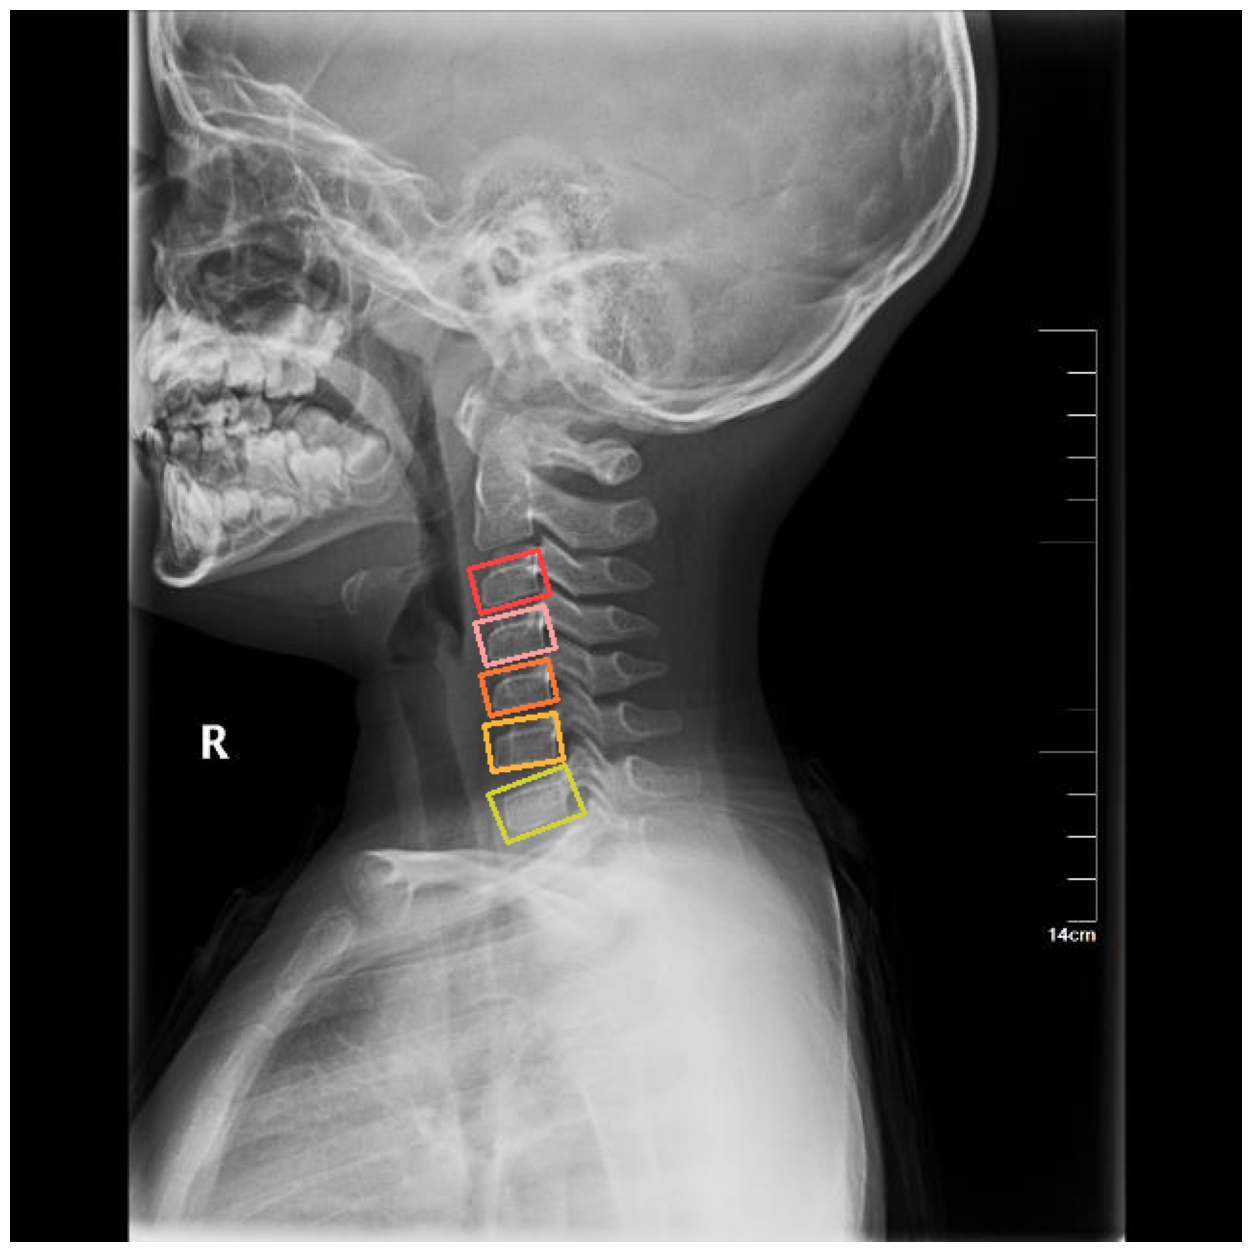

In [13]:
import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

oriented_box_annotator = sv.OrientedBoxAnnotator()
annotated_frame = oriented_box_annotator.annotate(
    scene=cv2.imread(file_name),
    detections=detections
)

sv.plot_image(image=annotated_frame, size=(16, 16))

In [14]:
model.save('/content/drive/MyDrive/yolov8obblow.h5')

In [15]:
# prompt: how can I download the runs folder

from google.colab import files
import shutil

# Zip the 'runs' folder
shutil.make_archive('runs', 'zip', 'runs')

# Download the zip file
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>